### Introduction
The 2019 novel ‐ coronavirus (COVID ‐ 19) has affected 181 countries with approximately 1197405 confirmed cases (by 5th April). Understanding the transmission dynamics of the infection in each country which got affected on a daily basis and evaluating the effectiveness of control policies are critical for our further actions. To date, the statistics of COVID-19 reported cases show that more than 80% of infected are mild cases of disease, around 14% of infected have severe complications, and about 5% are categorized as critical disease victims. Statistics show that every day the number of sick people is growing. This work is aimed at analyzing the symptoms that will help identify blemishes. We will work on Feature selection with classification modules such as KNN, Gradient Boosting Classifier, Decision Tree Classifier, Random Forest Classifier, XGB Classifier.
<div style="background: #0f214f;">
    <img src="https://toppress.kz/wp-content/uploads/2021/03/22.jpg" width="70%">
</div>

### Data description and aim
Below  is columns that we will beused for our analysis:

**Symptoms:**<br>
+ Breathing Problem<br>
+ Fever<br>
+ Dry coughbr
+ Sore throatbr
+ *Running nose* - Running nose is irritation and inflammation of the mucous membrane inside the nose.<br>
+ *Asthma* -  Asthma is a condition in which your airways narrow and swell and may produce extra mucus. <br>
+ *Chronic Lung Disease* - Types of chronic lung disease include asthma, chronic obstructive pulmonary disease (COPD), pulmonary fibrosis, asbestosis, pneumonitis, and other lung conditions.<br>
+ Headache<br>
+ Heart disease<br>
+ *Diabetes* - Diabetes mellitus, commonly known as diabetes, is a metabolic disease that causes high blood sugar. <br>
+ *Hypertension* - Blood pressure is the force exerted by circulating blood against the walls of the body’s arteries, the major blood vessels in the body. Hypertension is when blood pressure is too high.<br>
+ Fatigue<br>
+ *Gastrointestinal* - Gastrointestinal is ills with the tract from the mouth to the anus which includes all the organs of the digestive system in humans. <br>

**Contact types:**<br>
+ Abroad travel<br>
+ Contact with COVID Patient<br>
+ Attended Large Gathering<br>
+ Visited Public Exposed Places<br>
+ Family working in Public Exposed Places<br>

**Sanitary standards:**<br>
+ Wearing masks<br>
+ Sanitization from Market<br>

**Aim** - Create telegram bot

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
import missingno as misno

### Data reading

In [5]:
data = pd.read_csv('data-2.csv')
data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


### Checking null values

In [6]:
data.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

<AxesSubplot:>

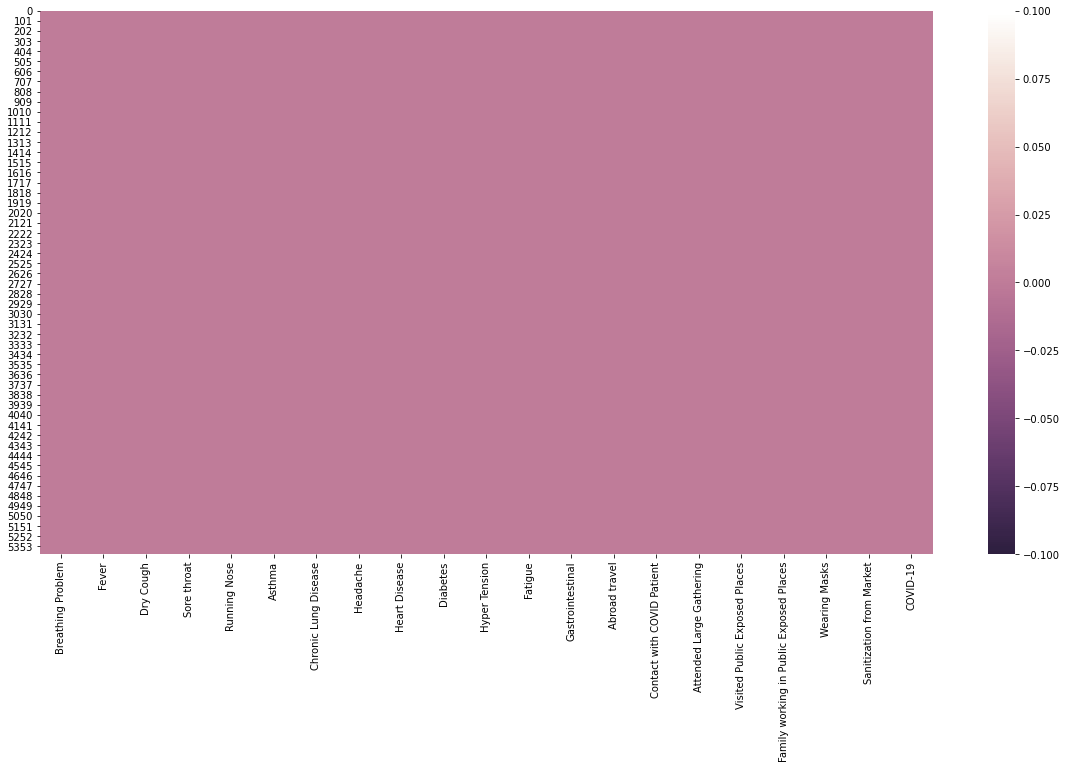

In [7]:
# Lets import seaborn. We will use seaborn to generate our charts
import seaborn as sns

# We will import matplotlib to resize our plot figure
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(data.isnull(), cmap=cmap)

### Preprocessing

In [8]:
data = data.replace({"Yes": 1, "No": 0})

In [9]:
data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print(data['COVID-19'].value_counts())

1    4383
0    1051
Name: COVID-19, dtype: int64


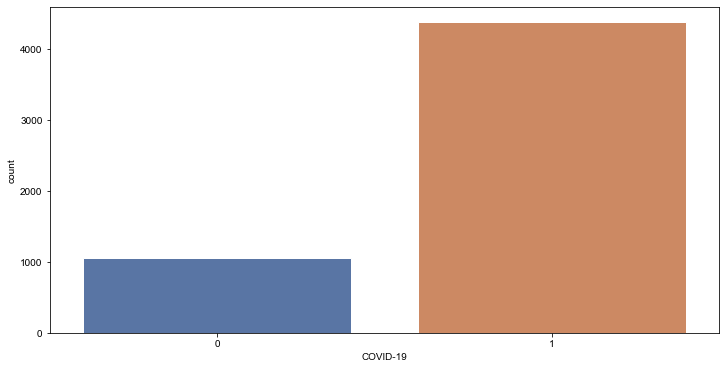

In [11]:
fig, ax = plt.subplots( figsize=(12, 6))
sns.set_theme(style="darkgrid")
sns.countplot(x="COVID-19",data=data)
plt.show()

In [12]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X = data.drop(['COVID-19'], axis = 1)
y = data['COVID-19']
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(5434, 2)


C:\Users\Mirolim\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [18 19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Mirolim\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [13]:
df_scores = pd.DataFrame(fs.scores_)
df_columns = pd.DataFrame(X.columns)

In [14]:
#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Column','Score'] 
print(f_Scores.nlargest(10,'Score'))  

                                     Column        Score
3                               Sore throat  1838.351306
2                                 Dry Cough  1492.747609
13                            Abroad travel  1332.843113
0                         Breathing Problem  1332.012046
15                 Attended Large Gathering   975.269166
14               Contact with COVID Patient   794.047042
1                                     Fever   772.679534
17  Family working in Public Exposed Places   143.093059
16            Visited Public Exposed Places    79.034823
10                            Hyper Tension    57.761226


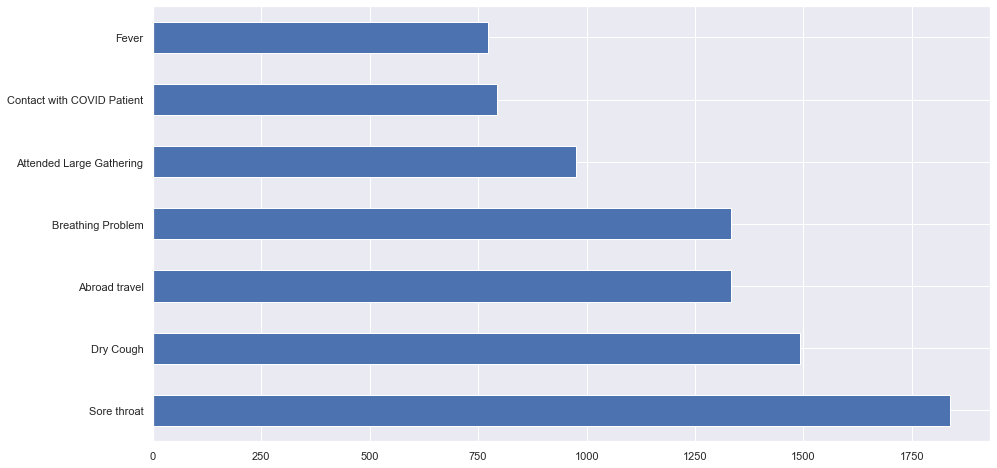

In [15]:
plt.figure(figsize=(15, 8))
feat_imp = pd.Series(fs.scores_, index=X.columns)
feat_imp.nlargest(7).plot(kind='barh')
plt.show()

### Handling imbalanced data

For handling with imbalaced target value we use Random Undersamoling 
Because ratio of target value is so large

Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.
This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset. This process can be repeated until the desired class distribution is achieved, such as an equal number of examples for each class.

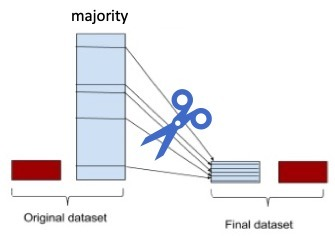


In [18]:
# example of random undersampling to balance the class distribution
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X = data.drop('COVID-19', axis = 1)
y = data['COVID-19']
y = y.astype('int')
# summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({1: 4383, 0: 1051})
Counter({0: 1051, 1: 1051})


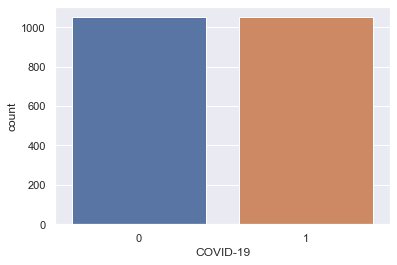

In [19]:
Y = pd.DataFrame({'COVID-19':y_over})
sns.countplot(data = Y, x = 'COVID-19', y= None)
plt.show()

### Predicting without feature selection

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

In [21]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [22]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[316,   6],
       [ 19, 290]], dtype=int64)

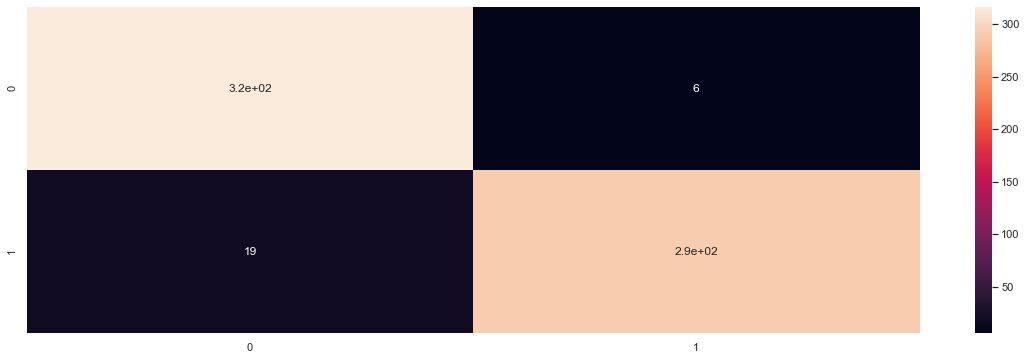

In [23]:
corrMatrix = cnf_matrix
plt.figure(figsize = (20,6))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9603803486529319
Precision: 0.9797297297297297
Recall: 0.9385113268608414


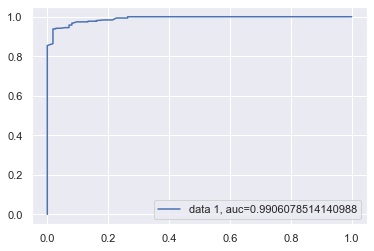

In [25]:
# ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### k-Nearest Neighbors
The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand,

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)
from sklearn.neighbors import KNeighborsClassifier

In [27]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

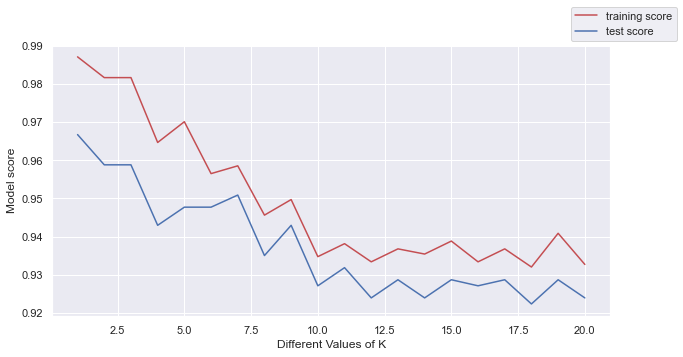

In [28]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [29]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=17)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [30]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy: 0.93


In [31]:
data = data.drop(columns=['Wearing Masks', 'Sanitization from Market'])

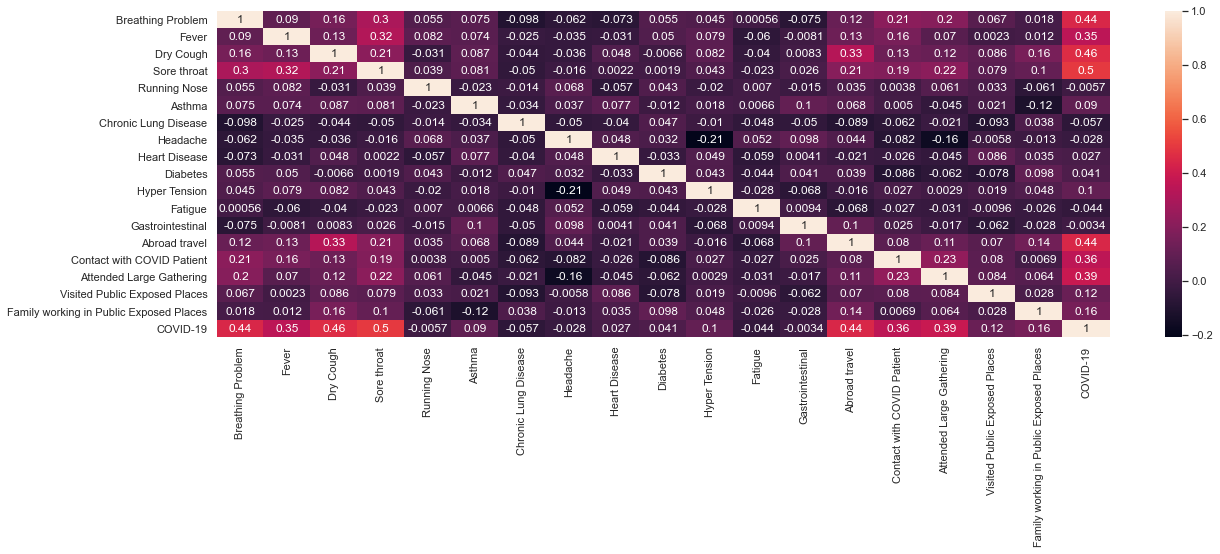

In [32]:
corrMatrix = data.corr()
plt.figure(figsize = (20,6))
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Feature selection

In [33]:
data.drop(data.columns[[4,5,6,7,8,9,10,11,12]], axis = 1, inplace = True)
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,0,1,1,0,1
2,1,1,1,1,1,0,0,0,0,1
3,1,1,1,0,1,0,1,1,0,1
4,1,1,1,1,0,1,0,1,0,1


### Predicting

In [34]:
X = data.drop('COVID-19', axis = 1)
y = data['COVID-19']
y = y.astype('int')

In [35]:
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

In [37]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [38]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[311,  11],
       [ 13, 296]], dtype=int64)

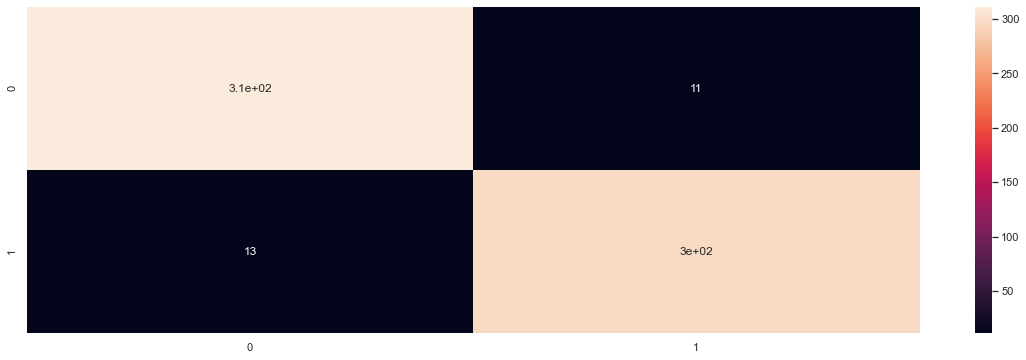

In [39]:
corrMatrix = cnf_matrix
plt.figure(figsize = (20,6))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9619651347068146
Precision: 0.9641693811074918
Recall: 0.9579288025889967


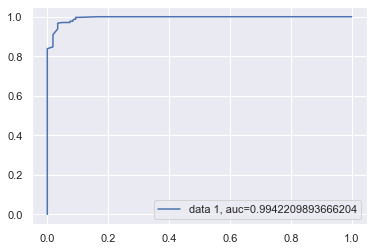

In [41]:
# ROC curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### k-Nearist Neighbors
The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand,

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42)
from sklearn.neighbors import KNeighborsClassifier

In [43]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

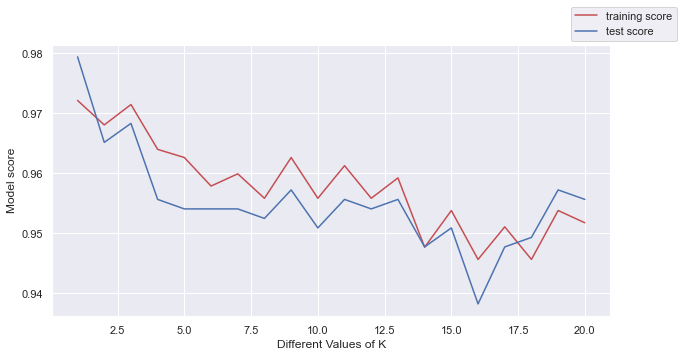

In [44]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [45]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=17)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [46]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),2))

Accuracy: 0.95


### Conclusion
In this work we worked with Feature selection and classification modules.
 After working with Feature selection, the accuracy of the classification modules decreased by 1-2%.
<br>A telegram bot was also created that will help diagnose a patient by analyzing his symptoms. With the help of the classification modules, we learned that the bot's accuracy is 96-97%. This will save you time, money, and unnecessary visits to the doctor.